# According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

# Attribute Information
1) id: unique identifier

2) gender: "Male", "Female" or "Other"

3) age: age of the patient

4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6) ever_married: "No" or "Yes"

7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8) Residence_type: "Rural" or "Urban"

9) avg_glucose_level: average glucose level in blood

10) bmi: body mass index

11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

12) stroke: 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

# Aim :
To classify / predict whether a patient can suffer a stroke.

It is a binary classification problem with multiple numerical and categorical features.

# import required libraries

In [340]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import dataset

In [341]:
df=pd.read_csv(r'C:\Users\asus\Downloads\archive (6) (1)\healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [342]:
# check the size of data shape.
df.shape

(5110, 12)

In [343]:
# Name of all the Attributes.
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [344]:
# check the data type.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [345]:
#object_variable=['gender','ever_married','work_type','Residence_type','smoking_status']

In [346]:
#check the null value in the data
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

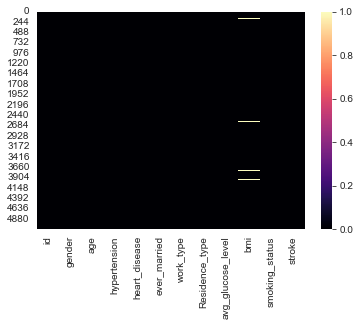

In [347]:
# showing null value using visualization.
sns.heatmap(df.isnull(),cmap = 'magma');
plt.show()


In [348]:
import plotly.express as px
fig = px.pie(df, values=df["hypertension"].value_counts().values,
             names=df["hypertension"].value_counts().index, 
             color_discrete_sequence=px.colors.diverging.Temps,title="Hypertension")

fig.update_traces(textposition='inside', textinfo='percent+label')

fig.show()

In [349]:
import plotly.express as px
fig = px.pie(df, values=df["gender"].value_counts().values,
             names=df["gender"].value_counts().index, 
             color_discrete_sequence=px.colors.diverging.Temps,title="gender")

fig.update_traces(textposition='inside', textinfo='percent+label')

fig.show()

C:\Users\asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



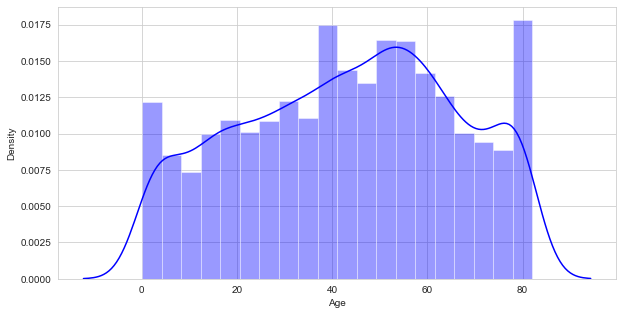

In [350]:
import seaborn as sns
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.distplot(df.age.values,color = "blue")
plt.xlabel('Age')
plt.show()

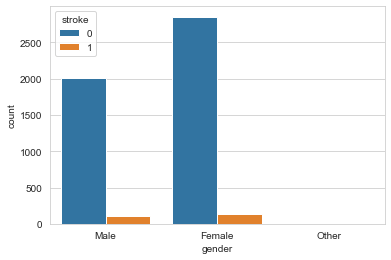

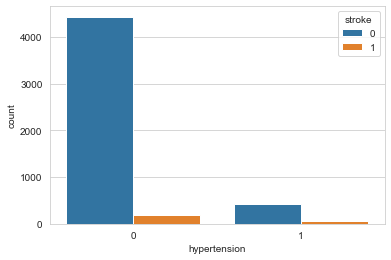

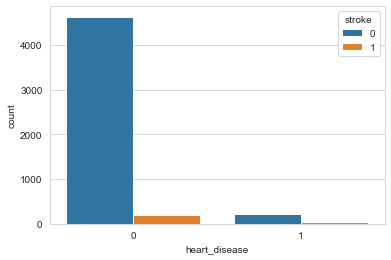

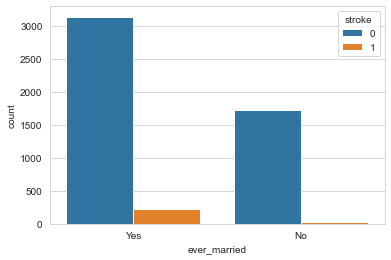

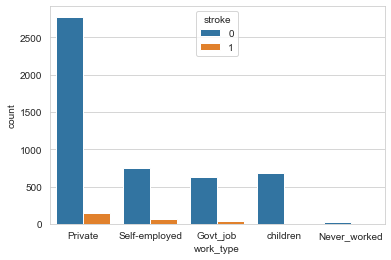

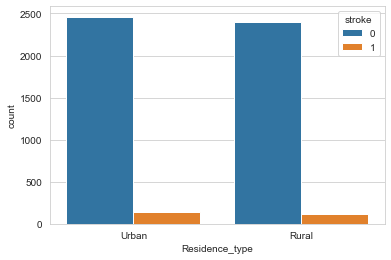

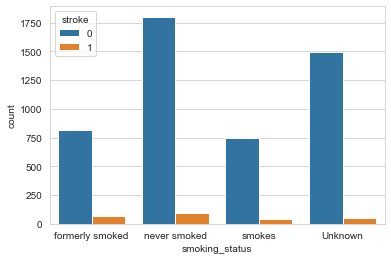

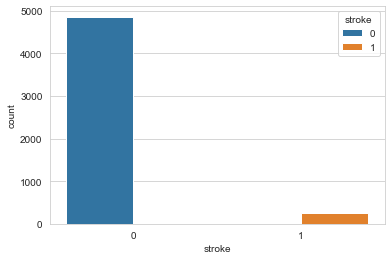

In [351]:
for col in df.columns[1:]:
    if df[col].dtypes=='object' or df[col].dtypes=='int64':
        sns.countplot(x=col,hue='stroke',data=df)
        plt.show()

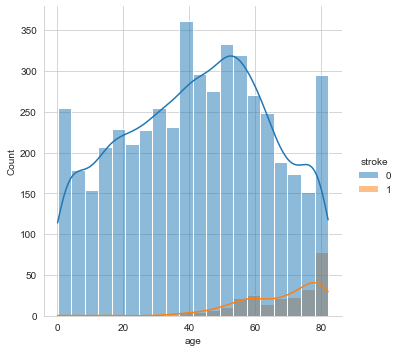

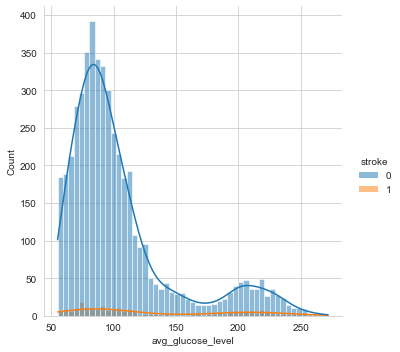

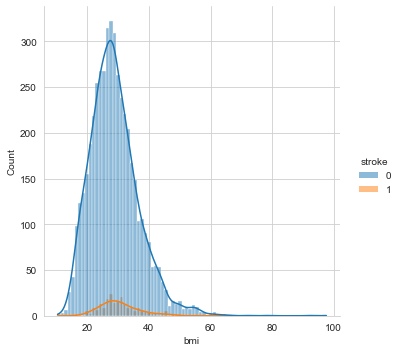

In [352]:
for i in df.columns:
    if df[i].dtypes == 'float64':
            sns.displot(data = df, x = i, hue = 'stroke', kde = True)
            plt.show()

C:\Users\asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



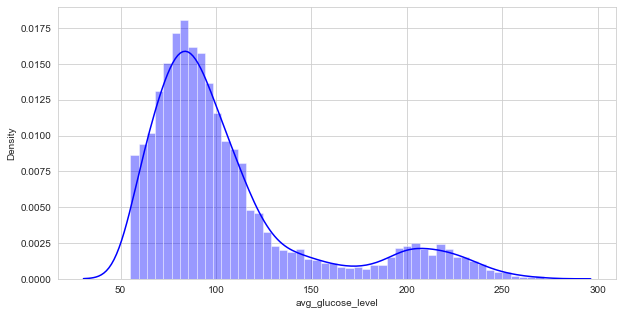

In [353]:
import seaborn as sns
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.distplot(df.avg_glucose_level.values,color = "blue")
plt.xlabel('avg_glucose_level')
plt.show()

In [163]:
df.age.values

array([67., 61., 80., ..., 35., 51., 44.])

In [356]:
import plotly.express as px
fig = px.histogram(df, nbins = 10, x="age")
fig.show()

In [368]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [165]:
# check mean before fill the null value.
df['bmi'].mean()

28.893236911794673

In [166]:
# I observed that mean and median value of bmi is same so,
# fill the null value by mean.
df['bmi'].fillna(value=df['bmi'].mean(),inplace=True)

In [167]:
# check mean after fill the null value.
df['bmi'].mean()

28.89323691179472

In [168]:
# Again check the null value- there is no null value present in the data set.
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

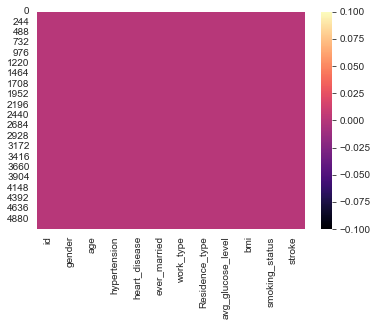

In [169]:
# again ckeck null value using visualization.
#plt.figure(figsize=(27,18))
sns.heatmap(df.isnull(),cmap = 'magma');
plt.show()


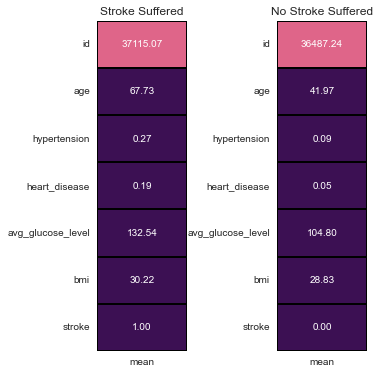

In [170]:
stroke = df[df['stroke'] == 1].describe().T
no_stroke = df[df['stroke'] == 0].describe().T

colors = ['#3C1053','#DF6589']

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))
plt.subplot(1,2,1)
sns.heatmap(stroke[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Stroke Suffered');

plt.subplot(1,2,2)
sns.heatmap(no_stroke[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Stroke Suffered');

fig.tight_layout(pad = 0)

1..Mean age values of patients that suffered a stroke, 67.73,is much higher than those did not suffer a stroke, 41.97.
2..Similarly, avg_glucose_level value of 132.54 can indicate a higher chance of suffering from stroke than the avg_glucose_level value of 104.80.

# Exploratory Data Analysis

In [173]:
df.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.002999,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.325942,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.160189,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.038899,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.168751,0.131945
bmi,0.002999,0.325942,0.160189,0.038899,0.168751,1.000000,0.038947
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.038947,1.000000


In [174]:
# remove id column which is not required for the dataset.
df.drop(['id'],axis=1,inplace=True)

In [175]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [176]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [177]:
df.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276398,0.263796,0.238171,0.325942,0.245257
hypertension,0.276398,1.000000,0.108306,0.174474,0.160189,0.127904
heart_disease,0.263796,0.108306,1.000000,0.161857,0.038899,0.134914
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.168751,0.131945
bmi,0.325942,0.160189,0.038899,0.168751,1.000000,0.038947
stroke,0.245257,0.127904,0.134914,0.131945,0.038947,1.000000


<AxesSubplot:>

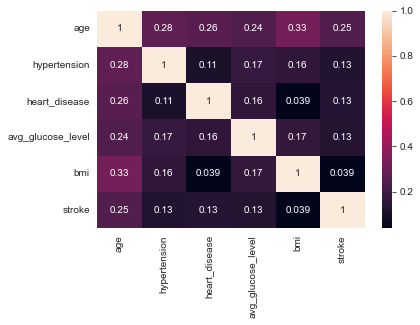

In [178]:
sns.heatmap(df.corr(),annot=True)

In [140]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

C:\Users\asus\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


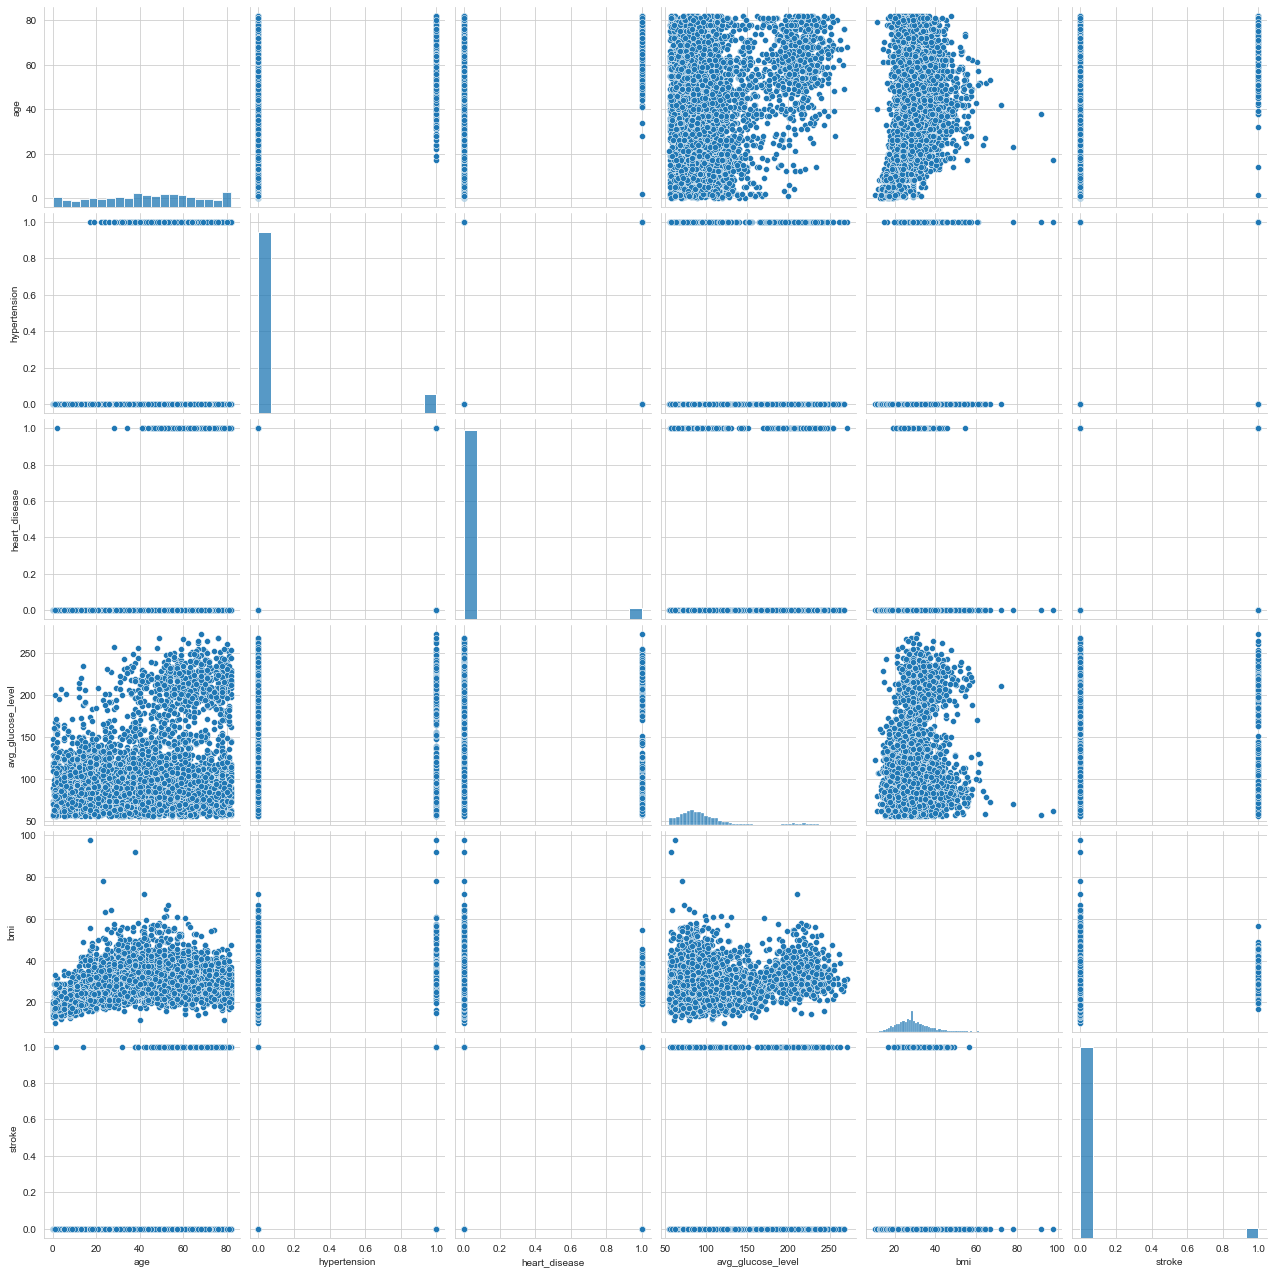

In [141]:
sns.set_style("whitegrid");
sns.pairplot(df, size=3);
plt.show()

Text(0.5, 1.0, 'Scatter plot on age vs avg_glucose_level')

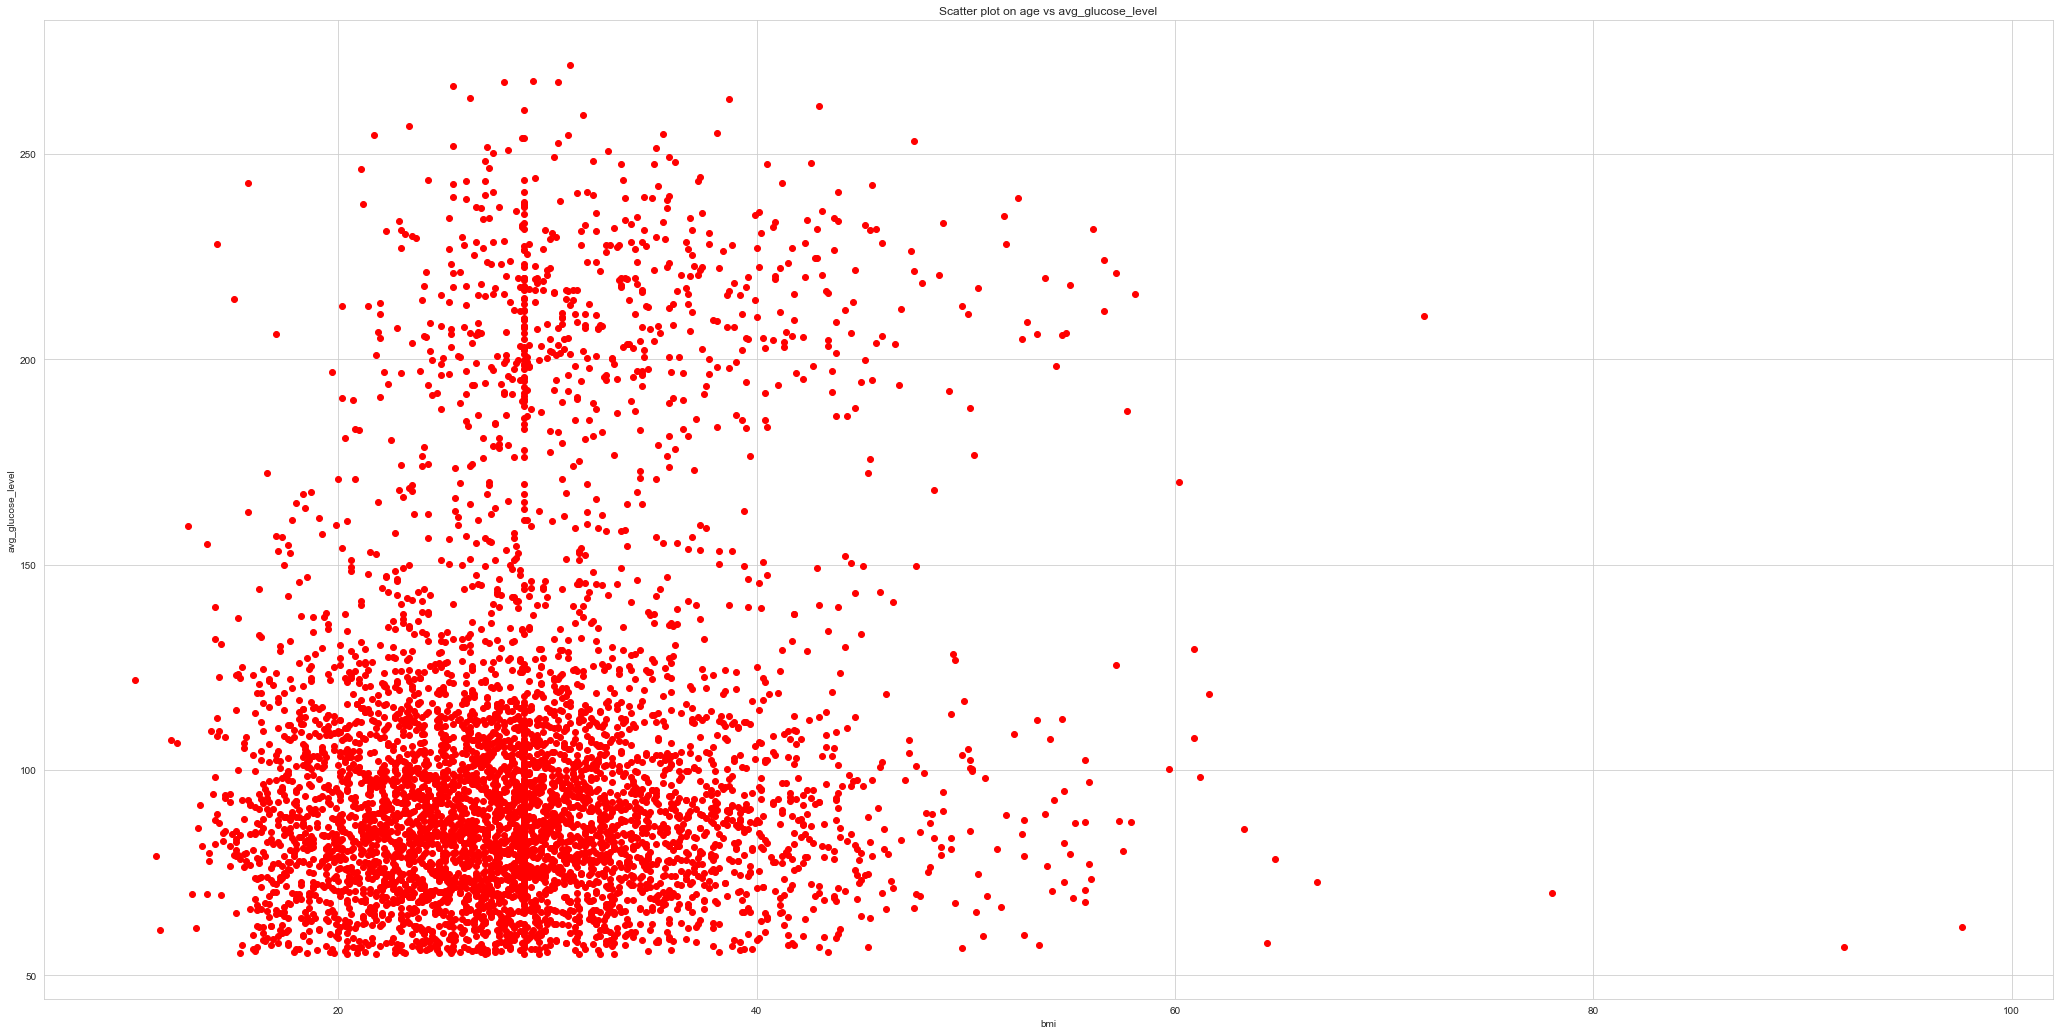

In [142]:
plt.figure(figsize=(36,18))
plt.scatter(df['bmi'],df['avg_glucose_level'],c='r')
plt.xlabel('bmi')
plt.ylabel('avg_glucose_level')
plt.title('Scatter plot on age vs avg_glucose_level')

Text(0.5, 1.0, 'Scatter plot on age vs avg_glucose_level')

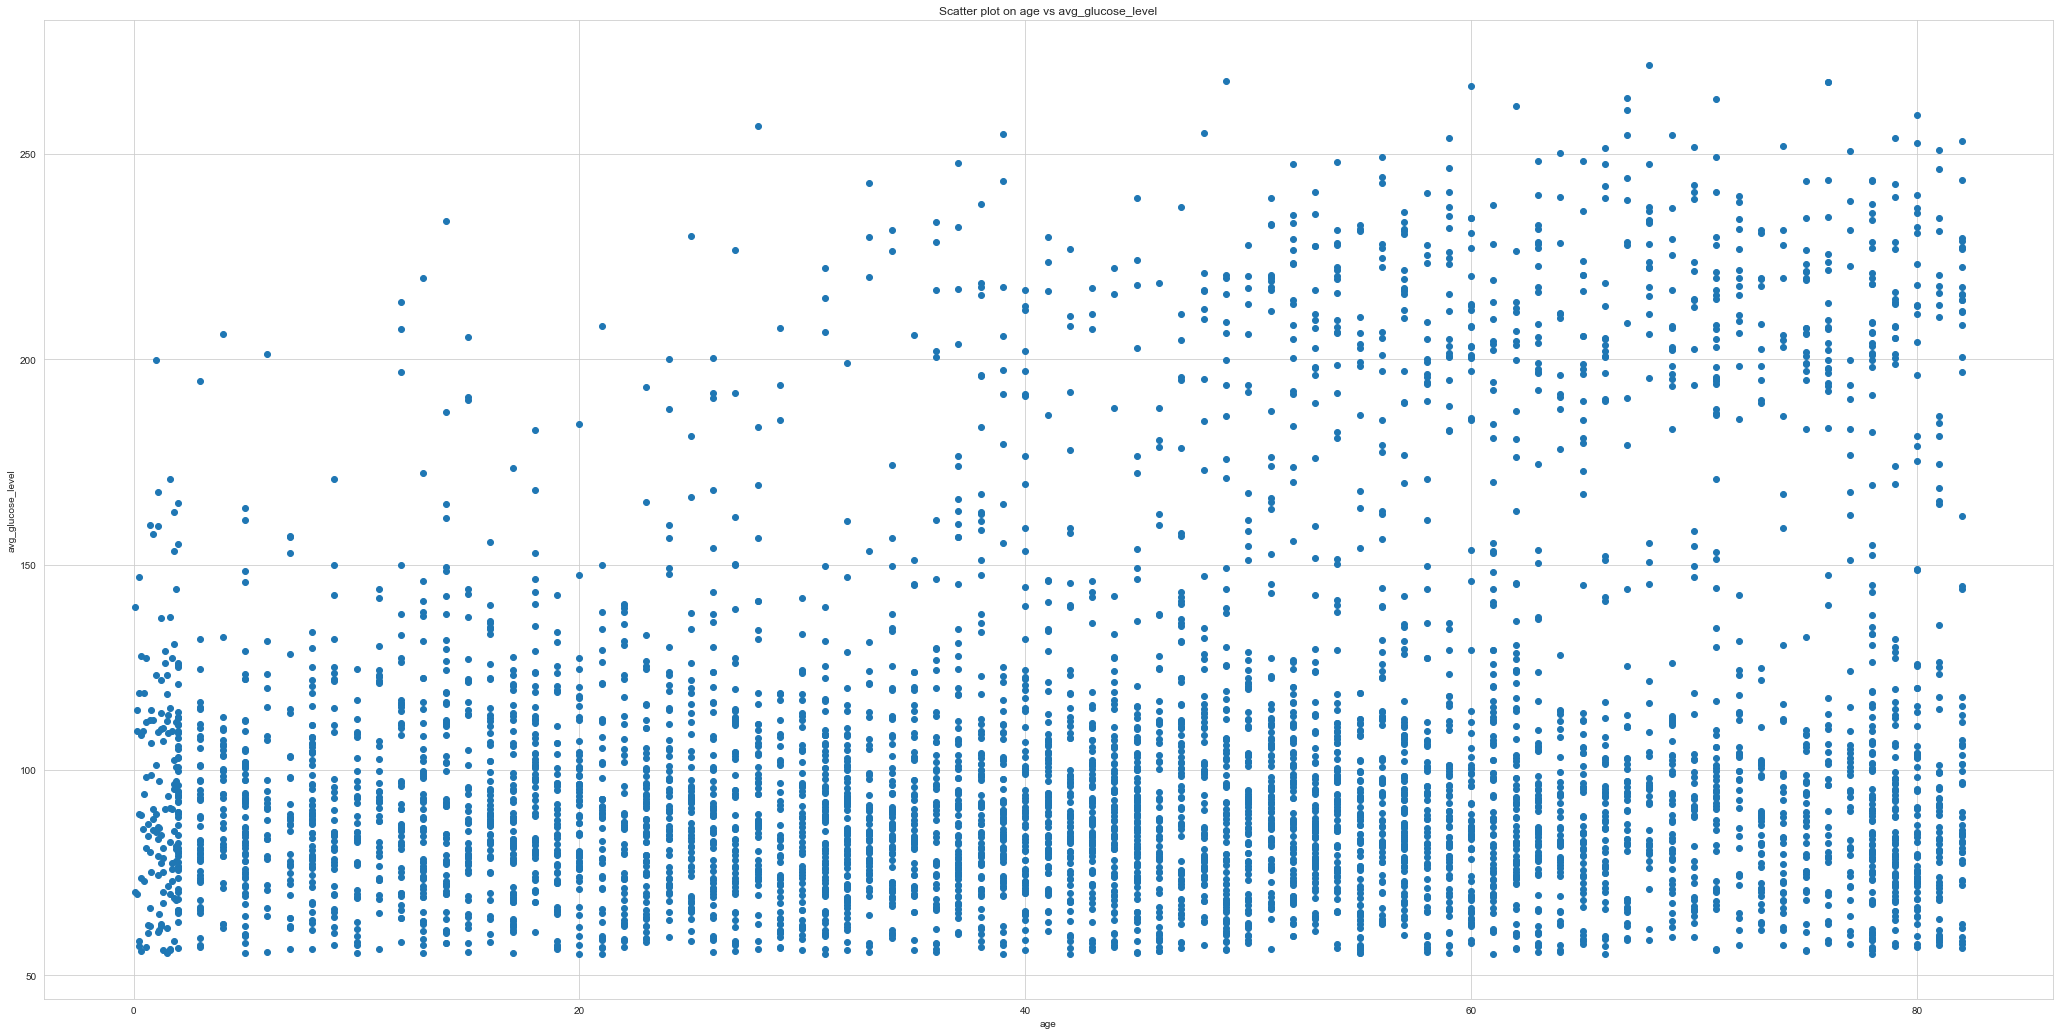

In [143]:
plt.figure(figsize=(36,18))
plt.scatter(df['age'],df['avg_glucose_level'])
plt.xlabel('age')
plt.ylabel('avg_glucose_level')
plt.title('Scatter plot on age vs avg_glucose_level')

In [179]:
df[df['gender']=='Other']

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [180]:
df=df.drop(3116)

In [181]:
df['gender'].value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

In [182]:
df['gender']=df['gender'].replace({'Female':1,'Male':0})

In [183]:
df['gender'].value_counts()

1    2994
0    2115
Name: gender, dtype: int64

In [184]:
df['ever_married'].value_counts()

Yes    3353
No     1756
Name: ever_married, dtype: int64

In [185]:
df['ever_married']=df['ever_married'].replace({'Yes':1,'No':0})

In [186]:
df['Residence_type'].value_counts()

Urban    2596
Rural    2513
Name: Residence_type, dtype: int64

In [187]:
df['Residence_type']=df['Residence_type'].replace({'Urban':1,'Rural':0})

In [188]:
df.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,Private,1,228.69,36.600000,formerly smoked,1
1,1,61.0,0,0,1,Self-employed,0,202.21,28.893237,never smoked,1


In [189]:
df['work_type'].value_counts()

Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [193]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

In [194]:
df['work_type']

0             Private
1       Self-employed
2             Private
3             Private
4       Self-employed
            ...      
5105          Private
5106    Self-employed
5107    Self-employed
5108          Private
5109         Govt_job
Name: work_type, Length: 5109, dtype: object

In [195]:
#return_df: bool
#boolean for whether to return a pandas DataFrame from transform (otherwise it will be a numpy array).
#use_cat_names: bool
#if True, category values will be included in the encoded column names. Since this can result in duplicate column names, duplicates are suffixed with '#' symbol until a unique name is generated.
#If False, category indices will be used instead of the category values.
import category_encoders as ce
enc = ce.OneHotEncoder(cols='work_type',return_df=True, use_cat_names=True)
MS_enc = enc.fit_transform(df['work_type'])
MS_enc.head()

,work_type_Private,work_type_Self-employed,work_type_Govt_job,work_type_children,work_type_Never_worked
0,1,0,0,0,0
1,0,1,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0


In [196]:
#drop_first=to avoid the dummy variable trap,
MS_dum_enc=pd.get_dummies(data=df['work_type'],drop_first=True)
MS_dum_enc.head()

,Never_worked,Private,Self-employed,children
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,1,0


In [197]:
df['Never_worked']=MS_dum_enc.Never_worked
df['Private']=MS_dum_enc['Private']
df['Self-employed']=MS_dum_enc['Self-employed']
df['children']=MS_dum_enc.children

In [198]:
import category_encoders as ce
enc = ce.OneHotEncoder(cols='smoking_status',return_df=True, use_cat_names=True)
MS_enc1 = enc.fit_transform(df['smoking_status'])
MS_enc1.head()

,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,smoking_status_Unknown
0,1,0,0,0
1,0,1,0,0
2,0,1,0,0
3,0,0,1,0
4,0,1,0,0


In [199]:
df['smoking_status']

0       formerly smoked
1          never smoked
2          never smoked
3                smokes
4          never smoked
             ...       
5105       never smoked
5106       never smoked
5107       never smoked
5108    formerly smoked
5109            Unknown
Name: smoking_status, Length: 5109, dtype: object

In [200]:
MS_dum_enc1=pd.get_dummies(data=df['smoking_status'],drop_first=True)
MS_dum_enc1.head()

,formerly smoked,never smoked,smokes
0,1,0,0
1,0,1,0
2,0,1,0
3,0,0,1
4,0,1,0


In [201]:
df['formerly smoked']=MS_dum_enc1['formerly smoked']
df['never smoked']=MS_dum_enc1['never smoked']
df['smokes']=MS_dum_enc1['smokes']

df['Stroke']=df.stroke

In [202]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Never_worked,Private,Self-employed,children,formerly smoked,never smoked,smokes,Stroke
0,0,67.0,0,1,1,Private,1,228.69,36.600000,formerly smoked,1,0,1,0,0,1,0,0,1
1,1,61.0,0,0,1,Self-employed,0,202.21,28.893237,never smoked,1,0,0,1,0,0,1,0,1
2,0,80.0,0,1,1,Private,0,105.92,32.500000,never smoked,1,0,1,0,0,0,1,0,1
3,1,49.0,0,0,1,Private,1,171.23,34.400000,smokes,1,0,1,0,0,0,0,1,1
4,1,79.0,1,0,1,Self-employed,0,174.12,24.000000,never smoked,1,0,0,1,0,0,1,0,1


In [203]:
df=df.drop(['work_type','smoking_status','stroke','Never_worked','Self-employed'],axis=1)

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   int64  
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   int64  
 5   Residence_type     5109 non-null   int64  
 6   avg_glucose_level  5109 non-null   float64
 7   bmi                5109 non-null   float64
 8   Private            5109 non-null   uint8  
 9   children           5109 non-null   uint8  
 10  formerly smoked    5109 non-null   uint8  
 11  never smoked       5109 non-null   uint8  
 12  smokes             5109 non-null   uint8  
 13  Stroke             5109 non-null   int64  
dtypes: float64(3), int64(6), uint8(5)
memory usage: 424.1 KB


In [205]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,Private,children,formerly smoked,never smoked,smokes,Stroke
0,0,67.0,0,1,1,1,228.69,36.600000,1,0,1,0,0,1
1,1,61.0,0,0,1,0,202.21,28.893237,0,0,0,1,0,1
2,0,80.0,0,1,1,0,105.92,32.500000,1,0,0,1,0,1
3,1,49.0,0,0,1,1,171.23,34.400000,1,0,0,0,1,1
4,1,79.0,1,0,1,0,174.12,24.000000,0,0,0,1,0,1


In [206]:
df.shape

(5109, 14)

In [334]:
df['age'].max()

82.0

In [335]:
df['age'].min()

0.08

In [336]:
df['avg_glucose_level'].max()

271.74

In [337]:
df['avg_glucose_level'].min()

55.12

In [338]:
df['bmi'].max()

97.6

In [339]:
df['bmi'].min()

10.3

In [207]:
#df['Self-employed'].value_counts()

In [208]:
df['smokes'].value_counts()

0    4320
1     789
Name: smokes, dtype: int64

In [209]:
#df['Never_worked'].value_counts()

In [210]:
df['Residence_type'].value_counts()

1    2596
0    2513
Name: Residence_type, dtype: int64

In [211]:
df['hypertension'].value_counts()

0    4611
1     498
Name: hypertension, dtype: int64

In [212]:
df['heart_disease'].value_counts()

0    4833
1     276
Name: heart_disease, dtype: int64

In [213]:
df['ever_married'].value_counts()

1    3353
0    1756
Name: ever_married, dtype: int64

# When data is unbalanced..

In [214]:
df['Stroke'].value_counts()

0    4860
1     249
Name: Stroke, dtype: int64

C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



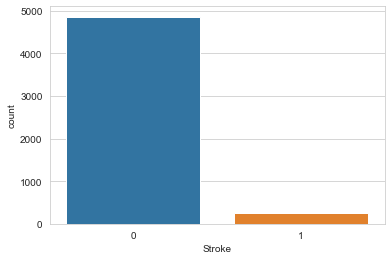

In [215]:
sns.countplot(df['Stroke'])
plt.show()
# It is clearly visible that data is unbalanced.

In [216]:
X=df.iloc[:,0:13]
X

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,Private,children,formerly smoked,never smoked,smokes
0,0,67.0,0,1,1,1,228.69,36.600000,1,0,1,0,0
1,1,61.0,0,0,1,0,202.21,28.893237,0,0,0,1,0
2,0,80.0,0,1,1,0,105.92,32.500000,1,0,0,1,0
3,1,49.0,0,0,1,1,171.23,34.400000,1,0,0,0,1
4,1,79.0,1,0,1,0,174.12,24.000000,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,1,80.0,1,0,1,1,83.75,28.893237,1,0,0,1,0
5106,1,81.0,0,0,1,1,125.20,40.000000,0,0,0,1,0
5107,1,35.0,0,0,1,0,82.99,30.600000,0,0,0,1,0
5108,0,51.0,0,0,1,0,166.29,25.600000,1,0,1,0,0


In [217]:
y=df.iloc[:,-1]
y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: Stroke, Length: 5109, dtype: int64

In [218]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [219]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)

# LogisticRegression model

In [220]:
from sklearn.linear_model import LogisticRegression

In [221]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

C:\Users\asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [222]:
y_pred = lr.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [223]:
lr.score(X_train,y_train)

0.95228774161977

In [224]:
lr.score(X_test,y_test)

0.9471624266144814

In [225]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9471624266144814

In [226]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[968,   0],
       [ 54,   0]], dtype=int64)

In [227]:
from sklearn import metrics
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.0
Recall: 0.0


C:\Users\asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



In [228]:
 from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       968
           1       0.00      0.00      0.00        54

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022



C:\Users\asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



# KNN model

In [229]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=20)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [230]:
y_predict=neigh.predict(X_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [231]:
accuracy_score(y_test, y_predict)

0.9471624266144814

# Neural Network

In [232]:
from sklearn.neural_network import MLPClassifier

In [233]:
mlp = MLPClassifier(hidden_layer_sizes=(22), activation='relu', solver='adam',max_iter=500,random_state=2)
mlp.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=22, max_iter=500, random_state=2)

In [234]:
y_pred_nn=mlp.predict(X_test)

In [235]:
print(f"Accuracy Score = %.3f" %accuracy_score(y_test,y_pred_nn))

Accuracy Score = 0.946


# SVM

In [236]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train,y_train)

SVC()

In [237]:
y_SVM=clf.predict(X_test)
y_SVM

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [238]:
accuracy_score(y_test, y_SVM)

0.9471624266144814

# SVM linear

In [239]:
 from sklearn.svm import LinearSVC
CLF= svm.LinearSVC()
CLF.fit(X_train,y_train)
LinearSVC()


C:\Users\asus\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



LinearSVC()

In [240]:
y_SVM=CLF.predict(X_test)

In [241]:
accuracy_score(y_test,y_SVM)

0.9471624266144814

In [242]:
from sklearn import metrics
print("Precision:",metrics.precision_score(y_test, y_SVM))
print("Recall:",metrics.recall_score(y_test, y_SVM))

Precision: 0.0
Recall: 0.0


C:\Users\asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



# Classifiaction and regression tree

In [243]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [244]:
y_dt=clf.predict(X_test)

In [245]:
accuracy_score(y_test,y_dt)

0.9119373776908023

In [246]:
from sklearn import metrics
print("Precision:",metrics.precision_score(y_test, y_SVM))
print("Recall:",metrics.recall_score(y_test, y_SVM))

Precision: 0.0
Recall: 0.0


C:\Users\asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



In [247]:
df

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,Private,children,formerly smoked,never smoked,smokes,Stroke
0,0,67.0,0,1,1,1,228.69,36.600000,1,0,1,0,0,1
1,1,61.0,0,0,1,0,202.21,28.893237,0,0,0,1,0,1
2,0,80.0,0,1,1,0,105.92,32.500000,1,0,0,1,0,1
3,1,49.0,0,0,1,1,171.23,34.400000,1,0,0,0,1,1
4,1,79.0,1,0,1,0,174.12,24.000000,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,1,80.0,1,0,1,1,83.75,28.893237,1,0,0,1,0,0
5106,1,81.0,0,0,1,1,125.20,40.000000,0,0,0,1,0,0
5107,1,35.0,0,0,1,0,82.99,30.600000,0,0,0,1,0,0
5108,0,51.0,0,0,1,0,166.29,25.600000,1,0,1,0,0,0


# when data is balanced..

In [248]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = df[(df['Stroke']==0)] 
df_minority = df[(df['Stroke']==1)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples=4860 , # to match majority class
                                 random_state=10)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [249]:
df_upsampled['Stroke'].value_counts()

1    4860
0    4860
Name: Stroke, dtype: int64

C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Stroke', ylabel='count'>

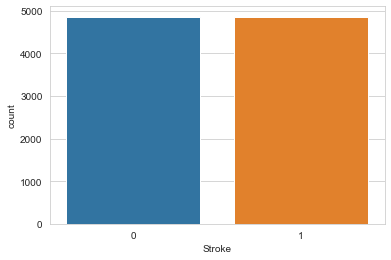

In [250]:
sns.countplot(df_upsampled['Stroke'])

In [251]:
df_upsampled.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,Private,children,formerly smoked,never smoked,smokes,Stroke
9,1,78.0,0,0,1,1,58.57,24.200000,1,0,0,0,0,1
125,1,72.0,0,0,1,1,131.41,28.400000,0,0,0,1,0,1
228,1,39.0,0,0,1,1,97.76,29.600000,0,0,0,0,1,1
15,1,50.0,1,0,1,0,167.41,30.900000,0,0,0,1,0,1
64,0,75.0,0,0,1,1,104.72,28.893237,1,0,0,0,0,1


# || Model Building||

In [252]:
X=df_upsampled.iloc[:,0:13]
X

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,Private,children,formerly smoked,never smoked,smokes
9,1,78.0,0,0,1,1,58.57,24.200000,1,0,0,0,0
125,1,72.0,0,0,1,1,131.41,28.400000,0,0,0,1,0
228,1,39.0,0,0,1,1,97.76,29.600000,0,0,0,0,1
15,1,50.0,1,0,1,0,167.41,30.900000,0,0,0,1,0
64,0,75.0,0,0,1,1,104.72,28.893237,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,1,80.0,1,0,1,1,83.75,28.893237,1,0,0,1,0
5106,1,81.0,0,0,1,1,125.20,40.000000,0,0,0,1,0
5107,1,35.0,0,0,1,0,82.99,30.600000,0,0,0,1,0
5108,0,51.0,0,0,1,0,166.29,25.600000,1,0,1,0,0


In [253]:
y=df_upsampled.iloc[:,-1]
y

9       1
125     1
228     1
15      1
64      1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: Stroke, Length: 9720, dtype: int64

In [254]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [255]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)

# Logistic Regression

In [256]:
from sklearn.linear_model import LogisticRegression

In [257]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

C:\Users\asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [258]:
y_pred = lr.predict(X_test)
y_pred

array([1, 1, 0, ..., 0, 0, 1], dtype=int64)

In [259]:
lr.score(X_train,y_train)

0.7763631687242798

In [260]:
lr.score(X_test,y_test)

0.7762345679012346

In [261]:
from sklearn.metrics import accuracy_score

In [262]:
accuracy_score(y_test, y_pred)

0.7762345679012346

In [263]:
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(y_test, y_pred)
matrix

array([[711, 239],
       [196, 798]], dtype=int64)

<AxesSubplot:>

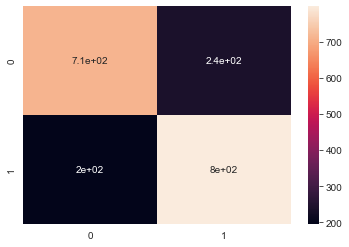

In [264]:
sns.heatmap(matrix, annot=True)

<AxesSubplot:>

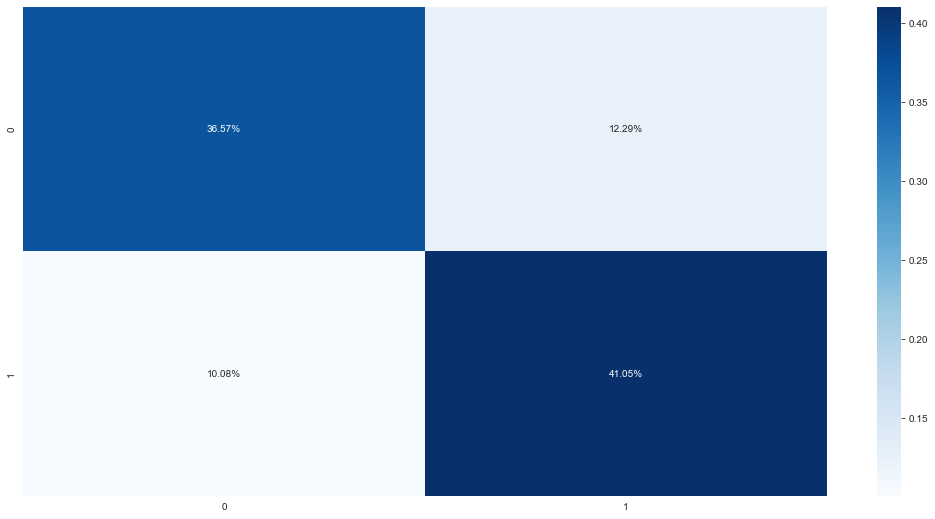

In [265]:
plt.figure(figsize=(18,9))
sns.heatmap(matrix/np.sum(matrix), annot=True, 
            fmt='.2%', cmap='Blues')

In [266]:
 from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.75      0.77       950
           1       0.77      0.80      0.79       994

    accuracy                           0.78      1944
   macro avg       0.78      0.78      0.78      1944
weighted avg       0.78      0.78      0.78      1944



In [267]:
from sklearn import metrics
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.7695274831243973
Recall: 0.8028169014084507


# KNN model

In [268]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=20)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [269]:
y_predict=neigh.predict(X_test)
y_predict

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [314]:
neigh.score(X_train,y_train)

0.8527520576131687

In [315]:
neigh.score(X_test,y_test)

0.8415637860082305

In [270]:
accuracy_score(y_test, y_predict)

0.8415637860082305

In [271]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict)

array([[675, 275],
       [ 33, 961]], dtype=int64)

In [272]:
 from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.95      0.71      0.81       950
           1       0.78      0.97      0.86       994

    accuracy                           0.84      1944
   macro avg       0.87      0.84      0.84      1944
weighted avg       0.86      0.84      0.84      1944



In [273]:
from sklearn import metrics
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_predict))

Precision: 0.7695274831243973
Recall: 0.9668008048289738


# neural network

In [274]:
from sklearn.neural_network import MLPClassifier

In [275]:
mlp = MLPClassifier(hidden_layer_sizes=(22), activation='relu', solver='adam',max_iter=500,random_state=2)
mlp.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=22, max_iter=500, random_state=2)

In [276]:
y_pred_nn=mlp.predict(X_test)
print(f"Accuracy Score = %.3f" %accuracy_score(y_test,y_pred_nn))

Accuracy Score = 0.788


In [316]:
mlp.score(X_train,y_train)

0.785108024691358

In [317]:
mlp.score(X_test,y_test)

0.7880658436213992

In [277]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_nn)

array([[702, 248],
       [164, 830]], dtype=int64)

In [278]:
 from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_nn))

              precision    recall  f1-score   support

           0       0.81      0.74      0.77       950
           1       0.77      0.84      0.80       994

    accuracy                           0.79      1944
   macro avg       0.79      0.79      0.79      1944
weighted avg       0.79      0.79      0.79      1944



In [279]:
from sklearn import metrics
print("Precision:",metrics.precision_score(y_test, y_pred_nn))
print("Recall:",metrics.recall_score(y_test, y_pred_nn))

Precision: 0.7699443413729128
Recall: 0.8350100603621731


# SVM 

In [320]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train,y_train)

SVC()

In [321]:
y_svm=clf.predict(X_test)
y_svm

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [322]:
clf.score(X_train,y_train)

0.7560442386831275

In [323]:
clf.score(X_test,y_test)

0.757201646090535

In [324]:
accuracy_score(y_test, y_svm)

0.757201646090535

In [283]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_svm)

array([[687, 263],
       [209, 785]], dtype=int64)

In [284]:
from sklearn import metrics
print("Precision:",metrics.precision_score(y_test, y_svm))
print("Recall:",metrics.recall_score(y_test, y_svm))

Precision: 0.7490458015267175
Recall: 0.789738430583501


# SVM LINEAR

In [285]:
from sklearn.svm import LinearSVC
CLF= svm.LinearSVC()
CLF.fit(X_train,y_train)
LinearSVC()


C:\Users\asus\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



LinearSVC()

In [286]:
Y_SVM_L=CLF.predict(X_test)

In [287]:
accuracy_score(y_test,Y_SVM_L)

0.6589506172839507

In [288]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, Y_SVM_L)

array([[867,  83],
       [580, 414]], dtype=int64)

In [289]:
from sklearn import metrics
print("Precision:",metrics.precision_score(y_test, Y_SVM_L))
print("Recall:",metrics.recall_score(y_test, Y_SVM_L))

Precision: 0.8329979879275654
Recall: 0.4164989939637827


# Decision Tree Classifier

In [325]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0,criterion='entropy')
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [327]:
dtc=clf.predict(X_test)

In [331]:
clf.score(X_train,y_train)

1.0

In [332]:
clf.score(X_test,y_test)

0.9753086419753086

In [328]:
accuracy_score(y_test,dtc)

0.9753086419753086

In [329]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, dtc)

array([[902,  48],
       [  0, 994]], dtype=int64)

In [330]:
from sklearn import metrics
print("Precision:",metrics.precision_score(y_test, dtc))
print("Recall:",metrics.recall_score(y_test, dtc))

Precision: 0.9539347408829175
Recall: 1.0


In [333]:
 from sklearn.metrics import classification_report
print(classification_report(y_test,dtc))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97       950
           1       0.95      1.00      0.98       994

    accuracy                           0.98      1944
   macro avg       0.98      0.97      0.98      1944
weighted avg       0.98      0.98      0.98      1944

